In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline


In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
rows = df.shape[0]
columns = df.shape[1]

print(f'The number of rows in the dataset: {rows} and the number of columns in the dataset {columns}')

The number of rows in the dataset: 16598 and the number of columns in the dataset 11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#take a look at the various different gaming platforms contained in the dataset
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [7]:
#the number of publishers contained in the dataset
df['Publisher'].nunique()

578

In [8]:

#change column names to ensure there is no confusion
df = df.rename(columns={'NA_Sales': 'North_America_sales', 'EU_Sales': 'Europe_Sales', 'JP_Sales': 'Japan_sales'})

In [9]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [10]:
#get a random sample of data in the dataset
df.sample(n=10)

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
2093,2095,Oddworld: Abe's Exoddus,PS,1998.0,Platform,GT Interactive,0.55,0.38,0.00,0.06,0.99
6161,6163,Famista '92,NES,1991.0,Sports,Namco Bandai Games,0.00,0.00,0.28,0.00,0.28
13698,13700,Gakuen Hetalia Portable,PSP,2011.0,Adventure,Idea Factory,0.00,0.00,0.04,0.00,0.04
3574,3576,Yu-Gi-Oh! World Championship Tournament 2004,GBA,2004.0,Misc,Konami Digital Entertainment,0.40,0.15,0.00,0.01,0.56
874,876,Star Wars: Dark Forces,PC,1994.0,Shooter,LucasArts,1.09,0.77,0.00,0.09,1.95
2325,2327,Call of Juarez: Bound in Blood,PS3,2009.0,Shooter,Ubisoft,0.35,0.38,0.01,0.16,0.89
2342,2344,EA Sports UFC 2,PS4,2016.0,Sports,Electronic Arts,0.28,0.47,0.00,0.14,0.89
4874,4876,Tales of Phantasia,SNES,1995.0,Role-Playing,Namco Bandai Games,0.00,0.00,0.40,0.00,0.40
2613,2615,Armored Core 2,PS2,2000.0,Simulation,Ubisoft,0.28,0.22,0.23,0.07,0.79
13288,13290,Wasteland 2,XOne,2015.0,Role-Playing,Deep Silver,0.04,0.01,0.00,0.00,0.05


The dates all have an extra .0  that we will need to remove
        -Will change date type for the year column to integer
        


In [11]:
df.isnull().sum()

Rank                     0
Name                     0
Platform                 0
Year                   271
Genre                    0
Publisher               58
North_America_sales      0
Europe_Sales             0
Japan_sales              0
Other_Sales              0
Global_Sales             0
dtype: int64

In [12]:
# dropping null values so as to convert float values in year to integer type
df = df.dropna()

In [13]:
df['Year'] = df['Year'].astype(int)

In [14]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [15]:
#look at top 5 of the best selling video games
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
#games and platform that had the worst global sales
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


<AxesSubplot:xlabel='Platform', ylabel='count'>

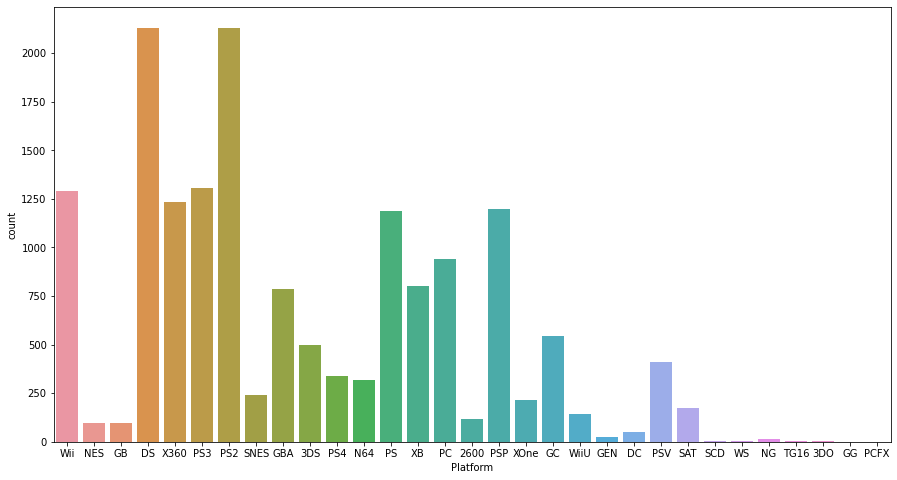

In [17]:
#lets look at the number of Platforms present in the dataset
plot.figure(figsize=(15,8))
sns.countplot(data = df, x='Platform')

Looking at this graph we can see that that platform the most popular with users are:<br>
    -PS2 & Nintendo DS which seems tied for first place.<br>
    -The Nintendo consoles seems to be the popular choice with most games being available on one of the Nintendo <br>
    systems<br>
    -Xb360 and PS3 were direct competitors for each other and Xb360 was still the new kid in the block, but its 
    support were almost equal to that of PS3
    

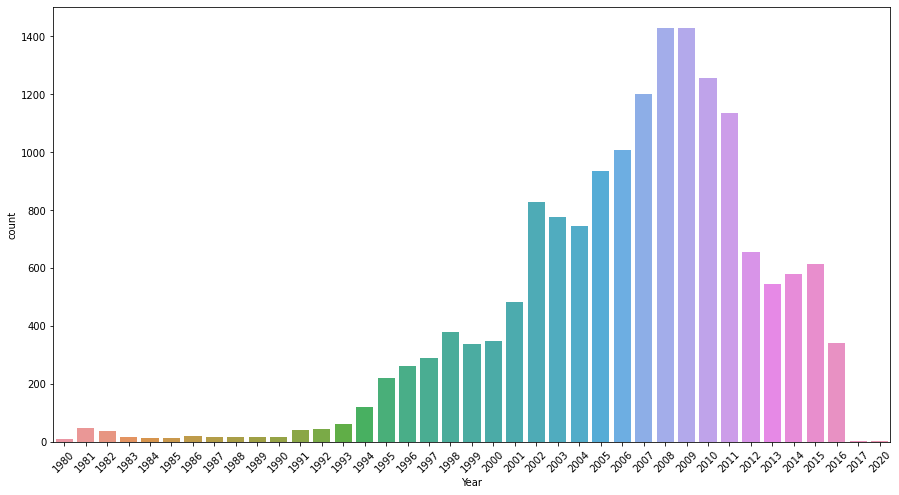

In [18]:
#look at number of releases per year.  
plot.figure(figsize=(15,8))
sns.countplot(data=df, x='Year')
plot.xticks(rotation =45);

2008 & 2009 was both big years for video games considering the number of games released for each year.


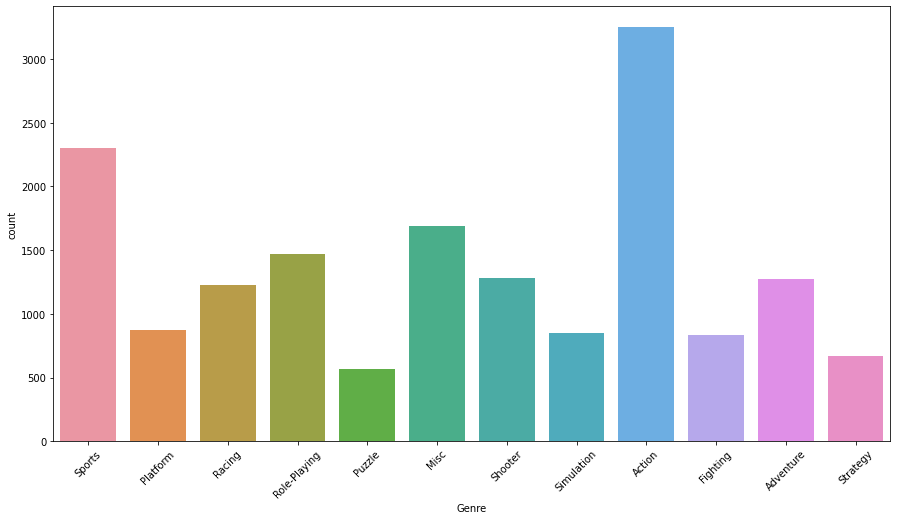

In [19]:
#look at different genres present in the dataset 
plot.figure(figsize=(15,8))
sns.countplot(data=df, x='Genre')
plot.xticks(rotation =45);

In [20]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In general it seems that action games are the most popular genre

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

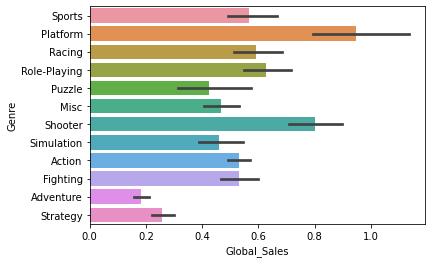

In [21]:
#look at global sales per genre

sns.barplot(data=df, x='Global_Sales', y='Genre')

    -interestingly platform type games has the most global sales.  
    -Global sales for adventure and strategy games are lagging far behind.  

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

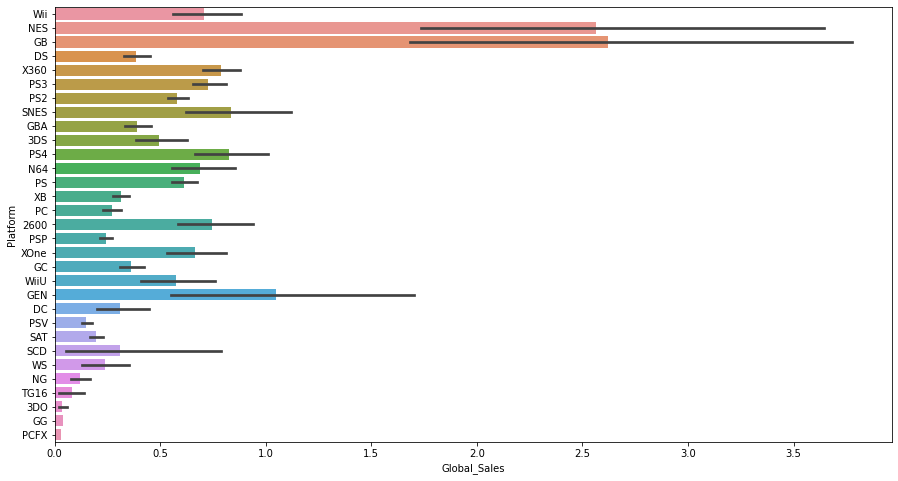

In [22]:
#look at global sales per platform
plot.figure(figsize=(15,8))
sns.barplot(data=df, x='Global_Sales', y='Platform')

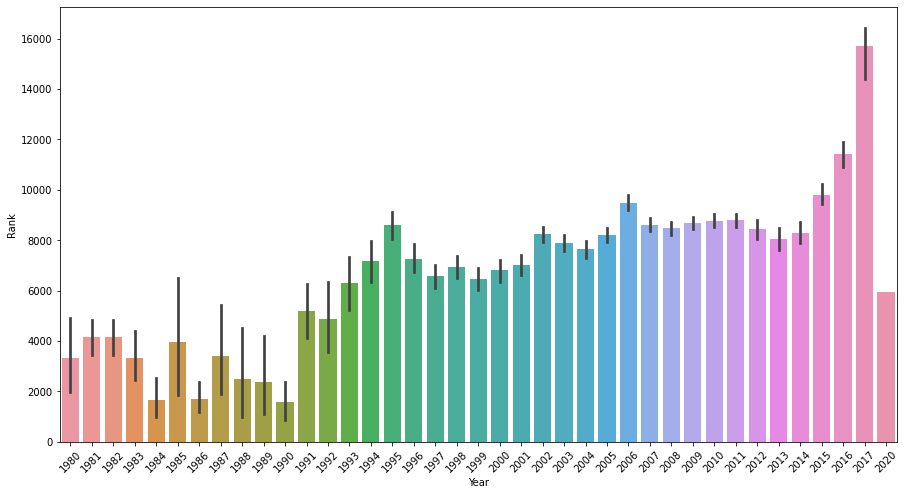

In [23]:
#look at distribution of gaming ranks by year
plot.figure(figsize=(15,8))
sns.barplot(data=df, y='Rank', x='Year')
plot.xticks(rotation = 45);

The majority of bad ranking games seems to be those new generation games.  With the games from the so called golden era of gaming having a lot of titles that are ranked better

Get most popular game per gaming platform

Get most popular game per gaming platform
ps2, ps3, xbox360, xbone, PC


In [24]:
ps2 = df.query("Platform == 'PS2'")

ps2.sort_values(by='Global_Sales', ascending=False)
ps2

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
28,29,Gran Turismo 3: A-Spec,PS2,2001,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98
38,39,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
47,48,Gran Turismo 4,PS2,2004,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...,...,...,...,...,...,...
16559,16562,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,Alchemist,0.00,0.00,0.01,0.00,0.01
16561,16564,Kanokon: Esuii,PS2,2008,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16572,16575,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01
16580,16583,Real Rode,PS2,2008,Adventure,Kadokawa Shoten,0.00,0.00,0.01,0.00,0.01


which year had the highest global sales 

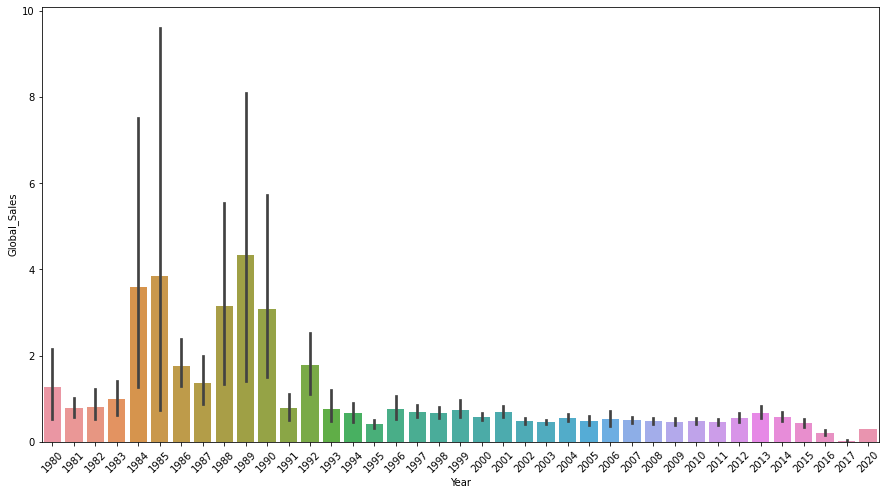

In [25]:
plot.figure(figsize=(15,8))
sns.barplot(data=df, x='Year', y='Global_Sales')
plot.xticks(rotation = 45);

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

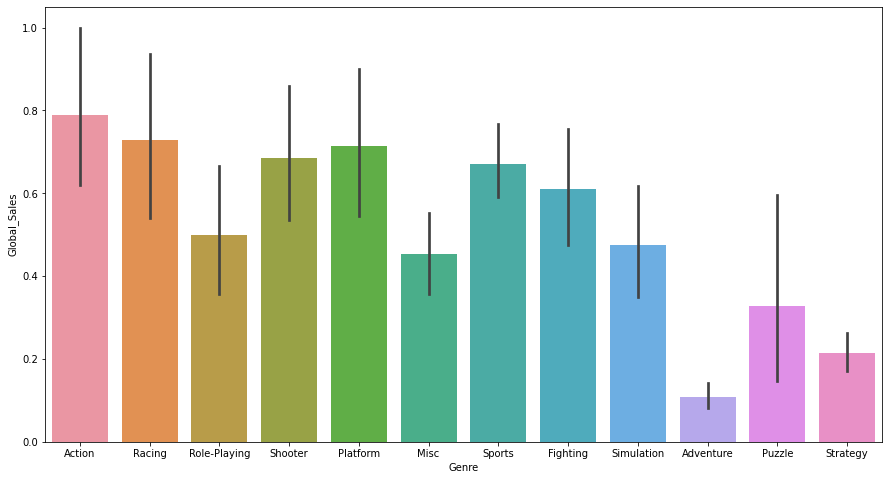

In [26]:
plot.figure(figsize=(15,8))
sns.barplot(data=ps2, x='Genre', y='Global_Sales')

For the PS2 the most popular genre was action games followed quite closely by racing games.

In [27]:
xbox360 = df.query("Platform == 'X360'")

xbox360.sort_values(by='Global_Sales', ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
16053,16056,Banjo-Kazooie,X360,2008,Platform,Microsoft Game Studios,0.00,0.01,0.00,0.00,0.01
16044,16047,Instant Brain,X360,2011,Adventure,Cave,0.00,0.00,0.01,0.00,0.01
16011,16014,Tom Clancy's Ghost Recon Advanced Warfighter ...,X360,2006,Shooter,Ubisoft,0.00,0.00,0.01,0.00,0.01
15988,15991,Don Bradman Cricket 14,X360,2014,Sports,Tru Blu Entertainment,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

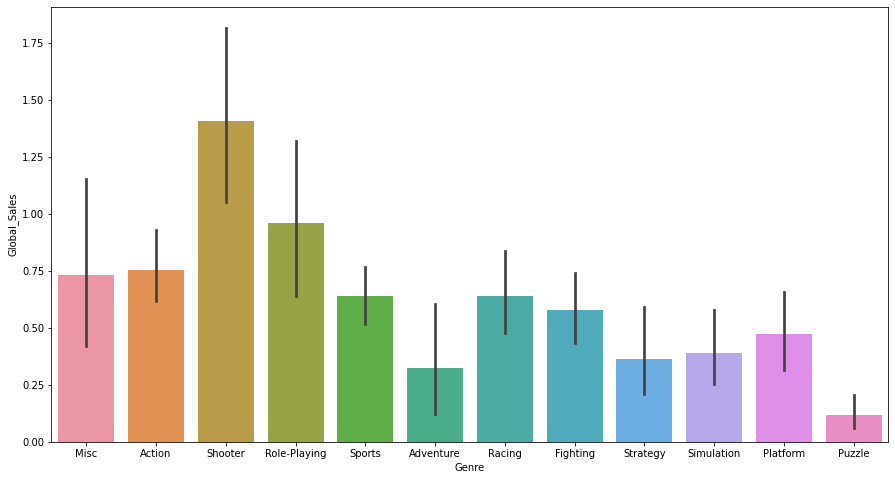

In [28]:
plot.figure(figsize=(15,8))
sns.barplot(data=xbox360, x='Genre', y='Global_Sales')

For the Xbox360 the most popular genre was shooter, then role playing, then action and then only racing.  For the Xbox360 racing is thus not such a popular genre

In [29]:
ps3 = df.query("Platform == 'PS3'")

ps3.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
54,55,Gran Turismo 5,PS3,2010,Racing,Sony Computer Entertainment,2.96,4.88,0.81,2.12,10.77
...,...,...,...,...,...,...,...,...,...,...,...
16084,16087,The Legend of Heroes: Trails in the Sky Third ...,PS3,2013,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16081,16084,Pro Angler Moves,PS3,2012,Sports,"Interworks Unlimited, Inc.",0.01,0.00,0.00,0.00,0.01
16036,16039,Utawarerumono: Futari no Hakuoro,PS3,2016,Misc,Aqua Plus,0.00,0.00,0.01,0.00,0.01
16014,16017,Nobunaga no Yabou Online: Houou no Shou,PS3,2012,Strategy,Ackkstudios,0.00,0.00,0.01,0.00,0.01


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

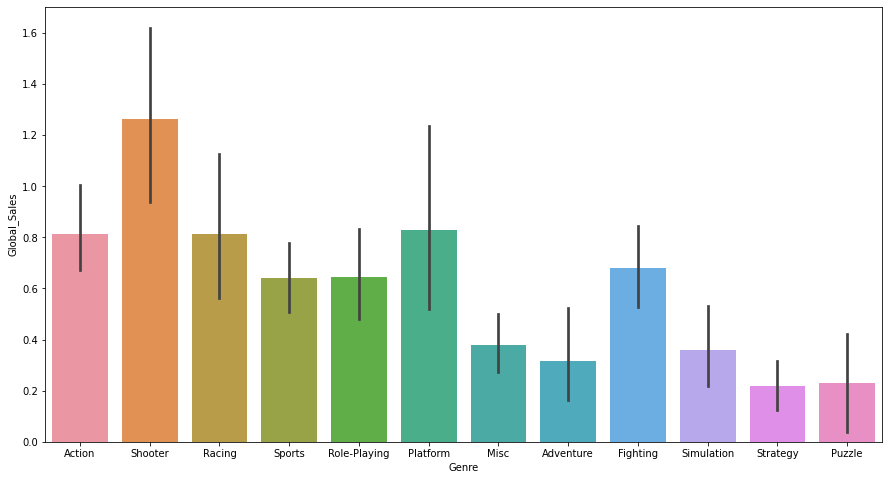

In [30]:
plot.figure(figsize=(15,8))
sns.barplot(data=ps3, x='Genre', y='Global_Sales')

The Xbox360 and PS3 were both direct competitors for each other.  In terms of the most popular genre on both consoles it seems to be shooter, but racing games are still more popular on the PS3 compared to the Xbox360

In [31]:
xone = df.query("Platform == 'XOne'")

xone.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
193,194,Call of Duty: Advanced Warfare,XOne,2014,Shooter,Activision,3.21,1.53,0.01,0.38,5.13
197,198,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
260,261,Halo 5: Guardians,XOne,2015,Shooter,Microsoft Game Studios,2.64,1.20,0.03,0.39,4.26
287,288,Fallout 4,XOne,2015,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
...,...,...,...,...,...,...,...,...,...,...,...
16276,16279,Assetto Corsa,XOne,2016,Racing,505 Games,0.00,0.01,0.00,0.00,0.01
16234,16237,Broken Sword 5: The Serpent's Curse,XOne,2015,Adventure,Revolution Software,0.00,0.01,0.00,0.00,0.01
16222,16225,Carmageddon: Max Damage,XOne,2016,Action,Stainless Games,0.01,0.01,0.00,0.00,0.01
16114,16117,Psycho-Pass,XOne,2014,Adventure,5pb,0.00,0.00,0.01,0.00,0.01


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

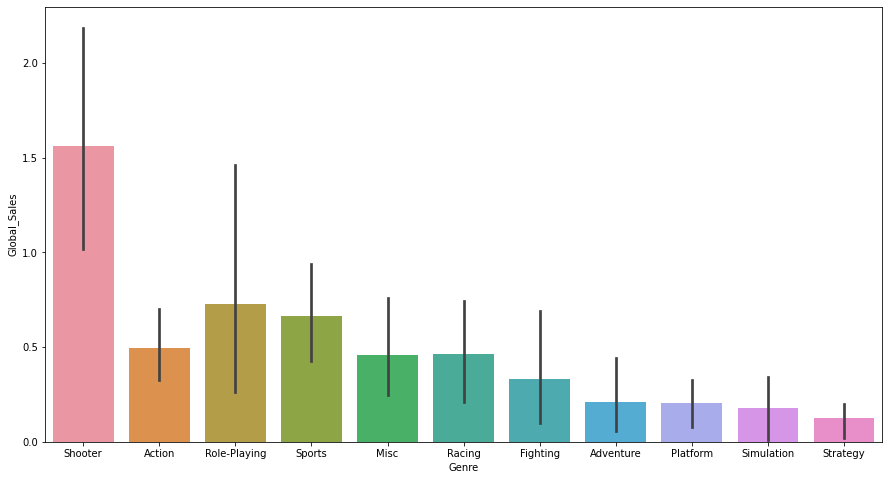

In [32]:
plot.figure(figsize=(15,8))
sns.barplot(data=xone, x='Genre', y='Global_Sales')

In [33]:
ps4 = df.query("Platform == 'PS4'")

ps4.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,North_America_sales,Europe_Sales,Japan_sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
...,...,...,...,...,...,...,...,...,...,...,...
16136,16139,Dragon's Dogma Online: Season 2,PS4,2016,Action,Capcom,0.00,0.00,0.01,0.00,0.01
16095,16098,Resident Evil 5 HD,PS4,2016,Action,Capcom,0.01,0.00,0.00,0.00,0.01
16048,16051,God Eater Off Shot:Shiou-hen Twin Pack & Anima...,PS4,2016,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16043,16046,Raven's Cry,PS4,2015,Role-Playing,TopWare Interactive,0.00,0.01,0.00,0.00,0.01


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

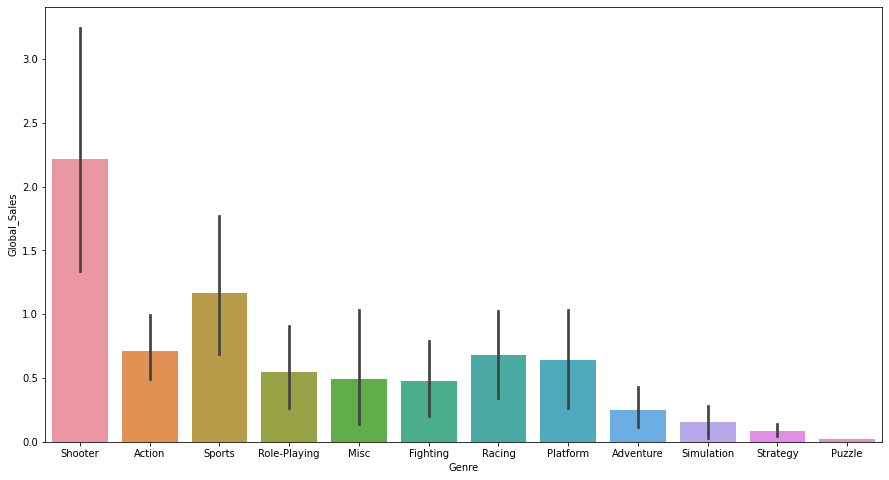

In [34]:
plot.figure(figsize=(15,8))
sns.barplot(data=ps4, x='Genre', y='Global_Sales')

## Conclusion 

Its interesting to note that in the top ranked games  some games are repeating throughout the list, but for different gaming platforms.  IE: GTA5 has been one of the best selling games accross 4 different platforms and different years.  <br>

Then with the PS2, X360 and PS3 the other game genres were more in line with the shooter genre.  However, with the "new" generation consoles ie: PS and Xbone the gap in popularite between the Shooter genre and other genres have significantly increased.

<br>

The majority of the games with lower(better) rankings seem to fall in the early years of gaming or the golden years of gaming.  

<br>

For gaming sales the 2008/2009 year seems to be the best year in video game sales.